# Classificação de imagem com rede neural artificial

In [1]:
import cv2
import numpy as np
import os 
import tensorflow as tf # Deep Learning
import pandas as pd # Manipulação de dados
import seaborn as sns # Visualização de dados
import matplotlib.pyplot as plt # Visualização de dados
import PIL # Manipulação de imagens
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import save_model
from keras.callbacks import EarlyStopping
tf.__version__

'2.12.0'

- Definindo caminho das imagens na variável arquivos

In [2]:
diretorio = "./data/homer_bart_1"
arquivos = [os.path.join(diretorio, arquivo) for arquivo in sorted(os.listdir(diretorio))]

- Precisamos definir o tamanho das imagens único para todas 128x128

In [3]:
largura, altura = 128, 128

- Variável imagens para armazenar as imagens em formato de array
- Variável classes para armazenar as classes das imagens 0 -> Homer, 1 -> Bart

In [4]:
imagens = []
classes = []

- Extração dos pixels das imagens

- Nesse bloco de código, estamos lendo as imagens, ajustando o seu tamanho, convertendo para escala de cinza, convertendo para array e adicionando na variável imagens.
- No finalzinho estamos pegando o nome referente a identificação da imagem e adicionando na variável classes para identificar a classe da imagem.

In [5]:
for arquivo in arquivos:
    try:
        imagem = cv2.imread(arquivo)
        (H, W) = imagem.shape[:2] # Altura e largura da imagem
    except:
        continue
    imagem = cv2.resize(imagem, (largura, altura)) # Redimensiona a imagem
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # Converte a imagem para tons de cinza
    imagem = imagem.ravel() # Converte a imagem para um vetor
    imagens.append(imagem) # Adiciona a imagem na lista de imagens
    nome_imagem = arquivo.split(os.path.sep)[-1] # Pega o nome da imagem
    if "homer" in nome_imagem:
        classes.append(0)
    else:
        classes.append(1)            

- Convertendo as imagens em array e suas respectivas classes em array numpy

In [6]:
X = np.array(imagens)
y = np.array(classes)

In [7]:
X.shape, y.shape

((269, 16384), (269,))

- Normalização dos dados

In [8]:
X[0].max(), X[0].min()

(255, 0)

- Pegamos os 256 pixes e fizemos a normalização entre 0 e 1 onde 1 é a cor branca e 0 é a cor preta

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

- Base de treinamento e teste
- A biblioteca sklearn possui uma função chamada train_test_split que faz a divisão da base de dados em treinamento e teste
- test_size = 0.25 -> 25% da base de dados será usada para teste e 75% para treinamento
- random_state = 1 -> Para que a divisão seja sempre a mesma

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215, 16384), (54, 16384), (215,), (54,))

## Construção e treinamento da rede neural

- units parâmetro de entrada de neurônios da camada oculta
- activation função de ativação da camada oculta
- input_shape parâmetro de entrada de neurônios da camada de entrada

In [13]:
network1 = tf.keras.models.Sequential() # Cria a rede neural sequencial 
network1.add(tf.keras.layers.Dense(units=8193, activation='relu', input_shape=(X_train.shape[1],))) # Adiciona a primeira camada oculta
network1.add(tf.keras.layers.Dense(units=8193, activation='relu')) # Adiciona a segunda camada oculta
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Adiciona a camada de saída

In [14]:
len(network1.layers)

3

In [15]:
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


- optimizer parametro de otimização dos pesos da rede neural (adam)
- loss função para calcular o erro (binary_crossentropy)
- metrics métrica para avaliar o modelo (accuracy)

In [16]:
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compila a rede neural

- Definição do callback para parar o treinamento quando a acurácia de validação não melhorar

In [17]:
# Definir o critério de parada antecipada
early_stopping = EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True)
# Incluir o critério de parada antecipada na lista de callbacks
callbacks_list = [early_stopping]
epochs = 100

- epochs quantidade de vezes que o modelo será treinado
- callbacks parâmetro para definir o callback de parada do treinamento
- validation_split parâmetro para definir a quantidade de dados que será usada para validação

In [18]:
historico = network1.fit(X_train, y_train, epochs=epochs, callbacks=callbacks_list) # Treina a rede neural

Epoch 1/100


7/7 [==============================] - 12s 2s/step - loss: 78.2320 - accuracy: 0.5023
Epoch 2/100
7/7 [==============================] - 11s 2s/step - loss: 21.8642 - accuracy: 0.5070
Epoch 3/100
7/7 [==============================] - 10s 1s/step - loss: 5.7501 - accuracy: 0.5302
Epoch 4/100
7/7 [==============================] - 10s 1s/step - loss: 7.2015 - accuracy: 0.4372
Epoch 5/100
7/7 [==============================] - 10s 1s/step - loss: 2.4736 - accuracy: 0.5116
Epoch 6/100
7/7 [==============================] - 10s 1s/step - loss: 0.6726 - accuracy: 0.5628
Epoch 7/100
7/7 [==============================] - 10s 1s/step - loss: 0.6785 - accuracy: 0.5860
Epoch 8/100
7/7 [==============================] - 10s 1s/step - loss: 0.6570 - accuracy: 0.6140
Epoch 9/100
7/7 [==============================] - 10s 1s/step - loss: 0.6522 - accuracy: 0.6140
Epoch 10/100
7/7 [==============================] - 10s 1s/step - loss: 0.6669 - accuracy: 0.6140
Epoch 11/100
7/7 [=====================

- Avaliação da rede neural

In [19]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

In [20]:
# criação da pasta para salvar os plots de treinamento
layers = len(network1.layers)
path = f'./plots_{epochs}_epocas_{layers}_camadas'
if not os.path.exists(path):
    os.makedirs(path, exist_ok=True)


- Plot dos valores de erro

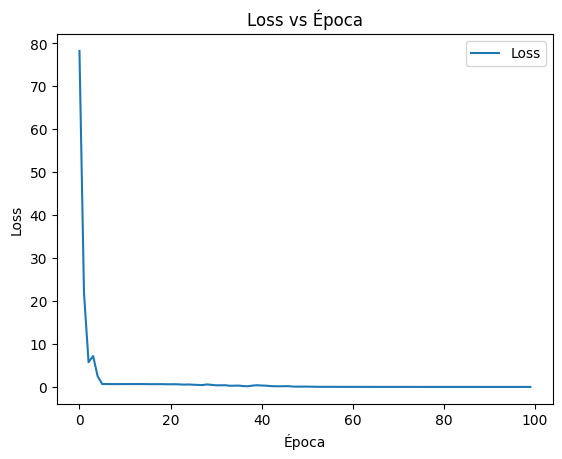

In [21]:
plt.plot(historico.history['loss']);
plt.xlabel('Época');
plt.ylabel('Loss');
plt.title('Loss vs Época');
plt.legend(['Loss']);
plt.savefig(f'{path}/loss_vs_epoca.png')
plt.show();

- Plot da acurácia que é a porcentagem de acerto

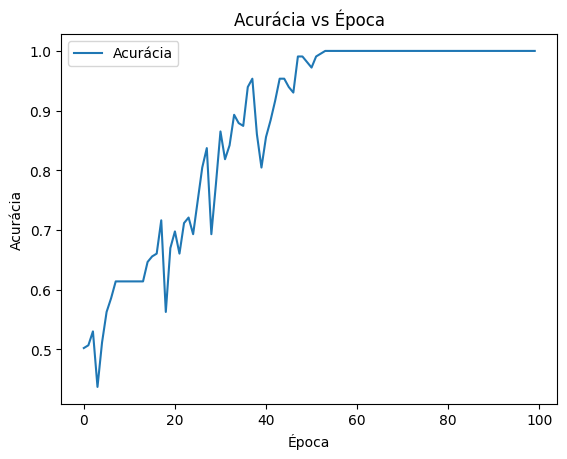

In [22]:
plt.plot(historico.history['accuracy']);
plt.xlabel('Época');
plt.ylabel('Acurácia');
plt.title('Acurácia vs Época');
plt.legend(['Acurácia']);
plt.savefig(f'{path}/acuracia_vs_epoca.png')
plt.show();

- o predict faz a previsão da imagem de teste

In [23]:
previsao = network1.predict(X_test)
previsao

2/2 [==============================] - 0s 53ms/step


array([[0.99942034],
       [0.00375725],
       [0.9997075 ],
       [0.99768156],
       [0.41748807],
       [0.9992256 ],
       [0.00383092],
       [0.11460526],
       [0.86660105],
       [0.19137695],
       [0.9986068 ],
       [0.00375725],
       [0.14561968],
       [0.48836717],
       [0.9909717 ],
       [0.9985363 ],
       [0.9557417 ],
       [0.49112874],
       [0.99623936],
       [0.9998051 ],
       [0.99990386],
       [0.584449  ],
       [0.99907684],
       [0.9500734 ],
       [0.99738747],
       [0.08933103],
       [0.9996177 ],
       [0.99917597],
       [0.98880345],
       [0.024893  ],
       [0.8773203 ],
       [0.00382431],
       [0.15902197],
       [0.99980587],
       [0.00383418],
       [0.99951166],
       [0.69033504],
       [0.9993195 ],
       [0.98126405],
       [0.99962056],
       [0.02129142],
       [0.11349736],
       [0.9982725 ],
       [0.9994886 ],
       [0.9992249 ],
       [0.95916915],
       [0.02122899],
       [0.999

- 0 false Homer
- 1 true Bart

In [24]:
# Se a previsão for maior que 0.5, então é Homer, caso contrário é Bart
previsao = (previsao > 0.5)
previsao
for i in range(len(previsao)):
    if previsao[i] == True:
        print(f"Homer - {'Homer' if y_test[i] == 0 else 'Bart'}") 
    else:
        print(f"Bart - {'Homer' if y_test[i] == 0 else 'Bart'}")   
        # melhorar saida

Homer - Bart
Bart - Homer
Homer - Bart
Homer - Bart
Bart - Bart
Homer - Homer
Bart - Bart
Bart - Bart
Homer - Bart
Bart - Bart
Homer - Bart
Bart - Homer
Bart - Homer
Bart - Bart
Homer - Homer
Homer - Homer
Homer - Homer
Bart - Homer
Homer - Bart
Homer - Bart
Homer - Bart
Homer - Homer
Homer - Bart
Homer - Bart
Homer - Bart
Bart - Homer
Homer - Bart
Homer - Bart
Homer - Homer
Bart - Homer
Homer - Homer
Bart - Homer
Bart - Homer
Homer - Homer
Bart - Homer
Homer - Homer
Homer - Bart
Homer - Bart
Homer - Bart
Homer - Bart
Bart - Homer
Bart - Homer
Homer - Bart
Homer - Bart
Homer - Bart
Homer - Homer
Bart - Homer
Homer - Bart
Homer - Bart
Bart - Homer
Homer - Bart
Bart - Homer
Bart - Homer
Homer - Homer


In [25]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

- acuracy mede a probabilidade de acerto da rede neural

In [26]:
# salvar acuracia em um arquivo txt
arq = open(f'{path}/accuracy.txt', "w")
arq.write(str(accuracy_score(y_test, previsao)))
arq.close()

accuracy_score(y_test, previsao)

0.7037037037037037

In [27]:
cm = confusion_matrix(y_test, previsao)
cm

array([[15, 11],
       [ 5, 23]], dtype=int64)

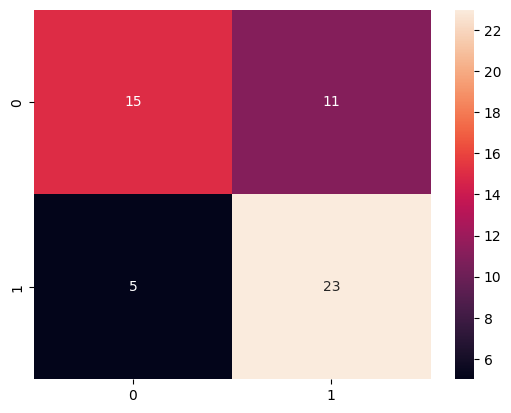

In [28]:
#salvar matriz de confusão
sns.heatmap(cm, annot=True, fmt='d',);
plt.savefig(f'{path}/matriz_confusao.png')
plt.show();

In [29]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65        26
           1       0.68      0.82      0.74        28

    accuracy                           0.70        54
   macro avg       0.71      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54



- Salvar e carregar o modelo treinado 

In [30]:
# Carrega o modelo
model_json = network1.to_json()
with open(f"{path}/model.json", "w") as json_file:
    json_file.write(model_json)

In [31]:
# Salvar modelo
network1_saved = save_model(network1, f"{path}/weights1.hdf5")

In [32]:
with open(f'{path}/model.json', 'r') as json_file:
    json_savedModel= json_file.read()
json_savedModel    

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": n

In [33]:
network1_loaded = tf.keras.models.model_from_json(json_savedModel)
network1_loaded.load_weights(f'{path}/weights1.hdf5')
network1_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________
